### 3. DECISION TREE

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

#### READING THE DATASET

In [2]:
df = pd.read_csv("mushrooms.csv")

#### EXPLORATARY DATA ANALYSIS (EDA)

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
df.shape

(8124, 23)

#### DATA VISUALIZATION

In [10]:
col = df.columns

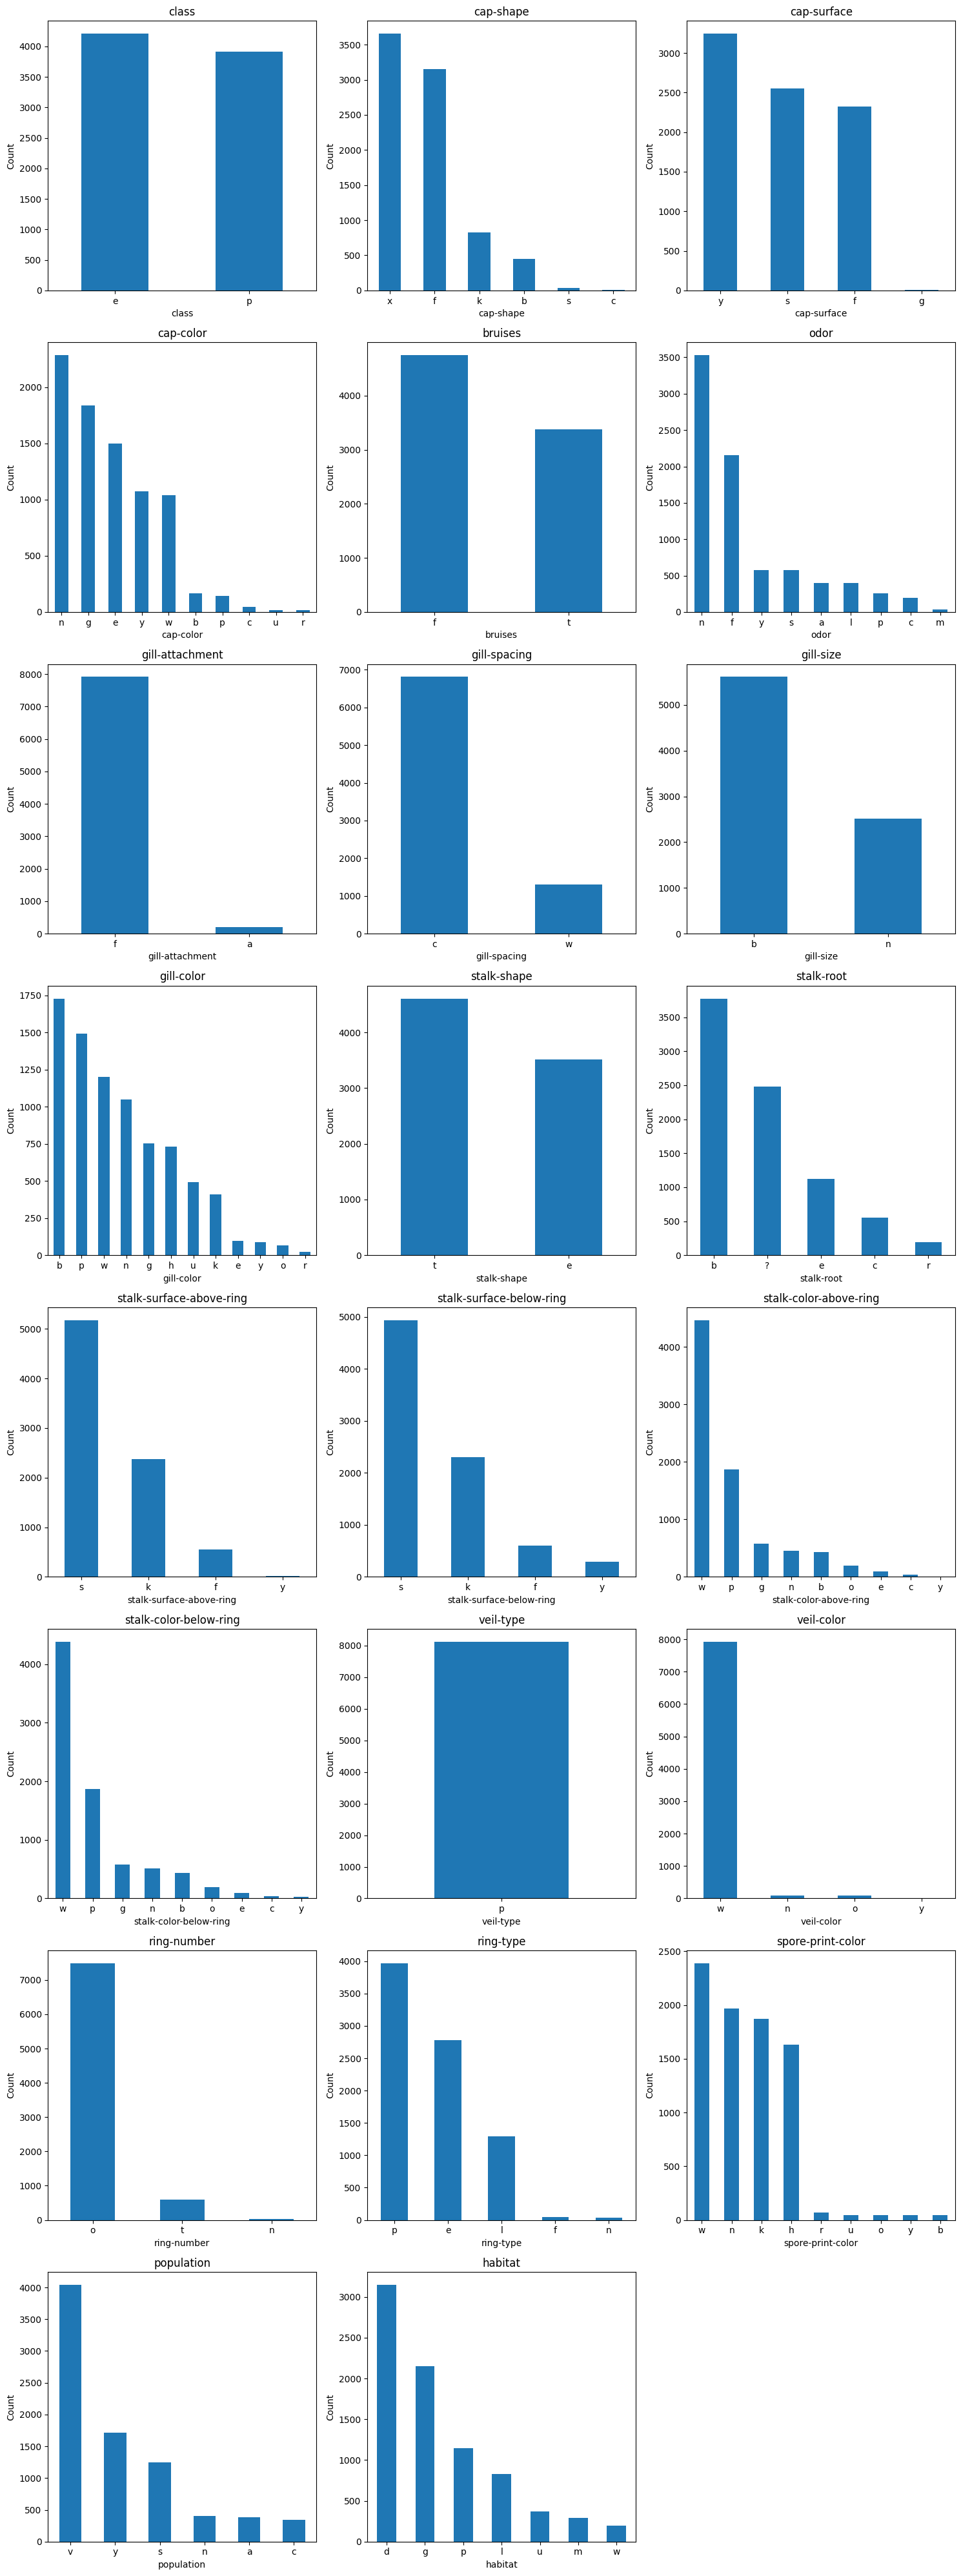

In [11]:
num_cols = len(col)
num_rows = (num_cols + 1) // 3 

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5)) 
axes = axes.flatten()

for i, column in enumerate(col):
    df[column].value_counts().plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### ENCODING

In [12]:
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### INDEPENDENT AND DEPENDENT FEATURES

In [13]:
x = df.drop(['class'],axis=1)
y = df['class']

In [14]:
x.shape

(8124, 22)

In [15]:
y.shape

(8124,)

#### TRAIN TEST SPLIT

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### MODEL (CRITERIA ENTROPY)

In [17]:
en_model = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=4)

In [18]:
en_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [19]:
y_pred_1 = en_model.predict(x_test)

In [20]:
y_pred_1

array([1, 0, 0, ..., 1, 1, 1])

#### PERFORMANCE METRICES

In [21]:
acc = accuracy_score(y_pred_1, y_test)
pre = precision_score(y_pred_1, y_test)
rec = recall_score(y_pred_1, y_test)
f1 = f1_score(y_pred_1, y_test)

In [22]:
print("Accuracy Score: ",acc)
print("Precision Score: ",pre)
print("Recall Score: ",rec)
print("F1 Score :",f1)

Accuracy Score:  0.9585726004922067
Precision Score:  0.9751286449399656
Recall Score:  0.9404466501240695
F1 Score : 0.9574736842105264


In [23]:
cm = confusion_matrix(y_pred_1, y_test)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[1200   29]
 [  72 1137]]


#### BRANCHES OF THE TREE

[Text(0.3181818181818182, 0.9, 'x[8] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(0.22727272727272727, 0.7, 'entropy = 0.0\nsamples = 1212\nvalue = [0, 1212]'),
 Text(0.4090909090909091, 0.7, 'x[19] <= 1.5\nentropy = 0.928\nsamples = 4474\nvalue = [2936, 1538]'),
 Text(0.18181818181818182, 0.5, 'x[4] <= 3.5\nentropy = 0.322\nsamples = 1159\nvalue = [68, 1091]'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.0\nsamples = 1091\nvalue = [0, 1091]'),
 Text(0.2727272727272727, 0.3, 'entropy = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(0.6363636363636364, 0.5, 'x[7] <= 0.5\nentropy = 0.571\nsamples = 3315\nvalue = [2868, 447]'),
 Text(0.45454545454545453, 0.3, 'x[19] <= 4.5\nentropy = 0.186\nsamples = 2779\nvalue = [2700, 79]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.0\nsamples = 2292\nvalue = [2292, 0]'),
 Text(0.5454545454545454, 0.1, 'entropy = 0.64\nsamples = 487\nvalue = [408, 79]'),
 Text(0.8181818181818182, 0.3, 'x[4] <= 5.5\nentropy = 0.897\nsamples = 

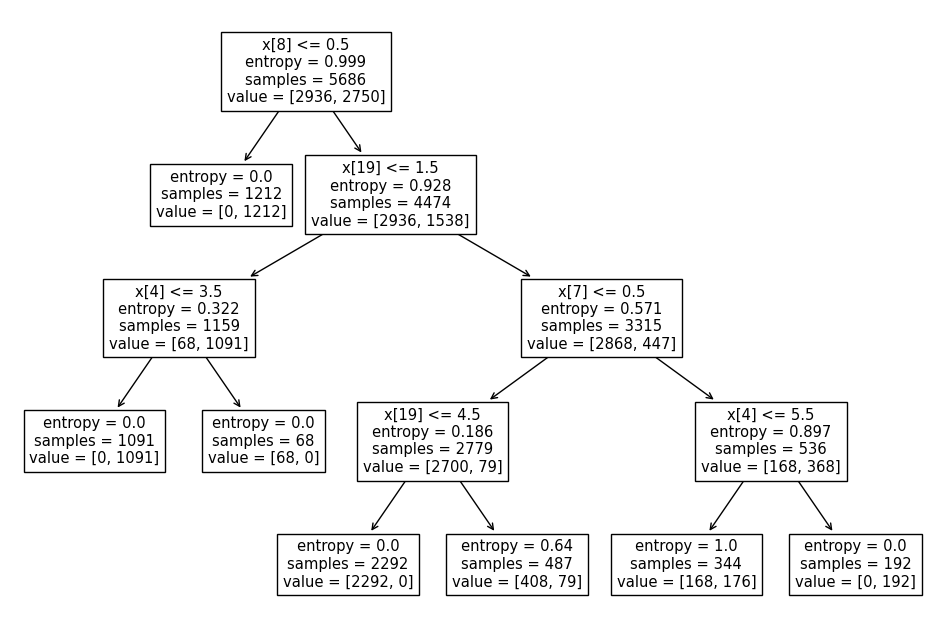

In [24]:
plt.figure(figsize=(12,8))

tree.plot_tree(en_model.fit(x_train, y_train)) 

#### MODEL (CRITERIA GINI INDEX)

In [25]:
gini_model = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=4)

In [26]:
gini_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [27]:
y_pred_2 = gini_model.predict(x_test)

In [28]:
y_pred_2

array([1, 0, 0, ..., 1, 1, 1])

#### PERFORMANCE METRICES

In [29]:
acc = accuracy_score(y_pred_2, y_test)
pre = precision_score(y_pred_2, y_test)
rec = recall_score(y_pred_2, y_test)
f1 = f1_score(y_pred_2, y_test)

In [30]:
print("Accuracy Score: ",acc)
print("Precision Score: ",pre)
print("Recall Score: ",rec)
print("F1 Score :",f1)

Accuracy Score:  0.9815422477440525
Precision Score:  0.9879931389365352
Recall Score:  0.9737954353338969
F1 Score : 0.9808429118773947


In [31]:
cm = confusion_matrix(y_pred_2, y_test)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[1241   14]
 [  31 1152]]


#### BRANCHES OF THE TREE

[Text(0.4642857142857143, 0.9, 'x[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(0.23809523809523808, 0.7, 'x[20] <= 3.5\ngini = 0.276\nsamples = 2313\nvalue = [383, 1930]'),
 Text(0.09523809523809523, 0.5, 'x[19] <= 1.5\ngini = 0.214\nsamples = 411\nvalue = [361, 50]'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.14285714285714285, 0.3, 'x[7] <= 0.5\ngini = 0.081\nsamples = 377\nvalue = [361, 16]'),
 Text(0.09523809523809523, 0.1, 'gini = 0.0\nsamples = 361\nvalue = [361, 0]'),
 Text(0.19047619047619047, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.38095238095238093, 0.5, 'x[10] <= 2.0\ngini = 0.023\nsamples = 1902\nvalue = [22, 1880]'),
 Text(0.3333333333333333, 0.3, 'x[12] <= 0.5\ngini = 0.009\nsamples = 1889\nvalue = [9, 1880]'),
 Text(0.2857142857142857, 0.1, 'gini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(0.38095238095238093, 0.1, 'gini = 0.0\nsamples = 1864\nvalue = [0, 1864]'),
 Text(0.428571

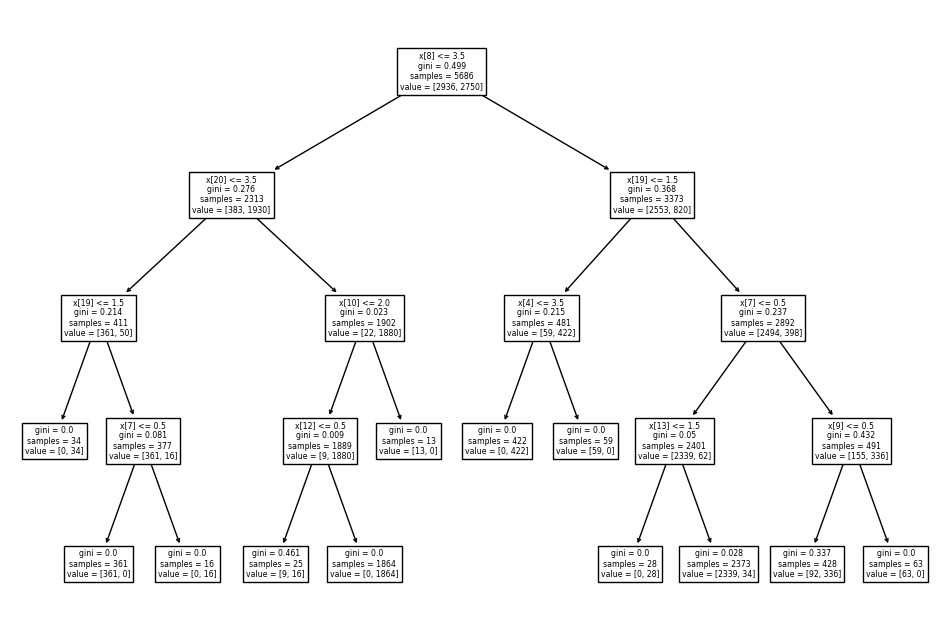

In [32]:
plt.figure(figsize=(12,8))

tree.plot_tree(gini_model.fit(x_train, y_train)) 